In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from CoursePythonCode.Chapter2.CreateDataset import CreateDataset
from CoursePythonCode.util.VisualizeDataset import VisualizeDataset
from CoursePythonCode.util import util
import copy
import os
import pandas as pd
%pylab inline
import json

Populating the interactive namespace from numpy and matplotlib


/home/cts/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [83]:
print(os.getcwd())

/home/cts/Desktop/ML4QS/Assignments/Assignment1_code


In [5]:
dataset_folder1 = './datasets/stairs/csv/label1/'
dataset_folder2 = './datasets/stairs/csv/label2/'
csv_files = [os.listdir(dataset_folder1),os.listdir(dataset_folder2)]
print("CSV files to add in the Dataset")
print(json.dumps(csv_files,indent=4))


CSV files to add in the Dataset
[
    [
        "labels.csv", 
        "linear_acceleration.csv", 
        "labels_old.csv", 
        "bmi160_gyroscope.csv", 
        "bmi160_step_counter.csv", 
        "bmi160_accelerometer.csv", 
        "timewindow_100_result.csv", 
        "timewindow_250_result.csv", 
        "labels2.csv", 
        "rpr0521_light_sensor.csv", 
        "rotation_vector.csv", 
        "rpr0521_proximity_sensor.csv", 
        "bmi160_step_detector.csv", 
        "orientation.csv", 
        "timewindow_1000_result.csv"
    ], 
    [
        "labels.csv", 
        "linear_acceleration.csv", 
        ".~lock.labels.csv#", 
        "bmi160_gyroscope.csv", 
        "bmi160_step_counter.csv", 
        "bmi160_accelerometer.csv", 
        "labels2.csv", 
        "rpr0521_light_sensor.csv", 
        "rotation_vector.csv", 
        "rpr0521_proximity_sensor.csv", 
        "bmi160_step_detector.csv", 
        "orientation.csv"
    ]
]


In [8]:
def create_dataset(dataset_folder=dataset_folder1,granularities = [100,250,1000]):
    datasets = []
    for millis in granularities:
        print('Running for granularity:%d'%millis)
        DataSet = CreateDataset(dataset_folder,millis)

        DataSet.add_numerical_dataset('linear_acceleration.csv', 'timestamp', ['x','y','z'], 'avg', 'lin_acc_')
        print('added acceleeration')
        DataSet.add_numerical_dataset('bmi160_gyroscope.csv', 'timestamp', ['x','y','z'], 'avg', 'gyr_')
        print('added gyroscope')
        DataSet.add_numerical_dataset('bmi160_step_counter.csv', 'timestamp', ['value'], 'avg', 'step_count_')
        print('added step counter')
        DataSet.add_numerical_dataset('rpr0521_light_sensor.csv', 'timestamp', ['light_intensity'], 'avg', 'light_')
        print('added light sensor')
        DataSet.add_numerical_dataset('rotation_vector.csv', 'timestamp', ['x','y','z','theta','phi'], 'avg', 
                                      'rotation_')
        print('added rotation')
        DataSet.add_numerical_dataset('rpr0521_proximity_sensor.csv', 'timestamp', ['x','y','z'], 'avg', 'proximity_')
        print('added proximity')
        DataSet.add_numerical_dataset('bmi160_step_detector.csv', 'timestamp', ['value'], 'avg', 'step_detect_')

        # We add the labels provided by the users. These are categorical events that might overlap. We add them
        # as binary attributes (i.e. add a one to the attribute representing the specific value for the label if it
        # occurs within an interval).
        DataSet.add_event_dataset('labels2.csv', 'label_start', 'label_end', 'label')
        
        dataset = DataSet.data_table
            # Plot the data

        DataViz = VisualizeDataset()

        # Boxplot
#         DataViz.plot_dataset_boxplot(dataset, ['lin_acc_x','lin_acc_y','lin_acc_z','gyr_x','gyr_y','gyr_z'])

        # Plot all data
        DataViz.plot_dataset(dataset, ['lin_acc', 
                                       'gyr_', 
                                       'step_count_', 
                                       'light_', 
                                       'rotation_', 
                                       'proximity_', 
                                       'step_detect_',
                                       'label'],
                             ['like', 'like', 'like', 'like', 'like', 'like', 'like','like','like'],
                             ['line', 'line', 'line', 'line', 'line', 'line', 'points', 'points','points'])

#         # And print a summary of the dataset

#         util.print_statistics(dataset)
        datasets.append(dataset)
        dataset.to_csv(dataset_folder1+'/timewindow_'+str(millis)+'_result.csv')
    
    return datasets
    

Running for granularity:100
added acceleeration
added gyroscope
added step counter
added light sensor
added rotation
added proximity


CoursePythonCode/util/VisualizeDataset.py:36: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plot.hold(True)
/home/cts/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/cts/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/home/cts/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))
/home/cts/anaconda2/lib/python2.7/site-packages/matplotlib

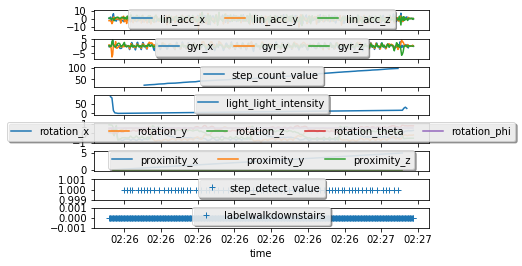

Running for granularity:250
added acceleeration
added gyroscope
added step counter
added light sensor
added rotation
added proximity


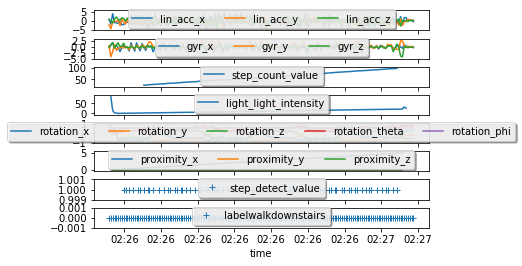

Running for granularity:1000
added acceleeration
added gyroscope
added step counter
added light sensor
added rotation
added proximity


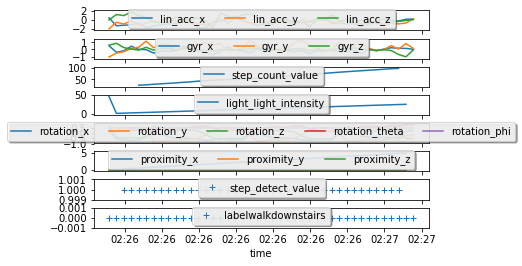

Running for granularity:100
added acceleeration
added gyroscope
added step counter
added light sensor
added rotation
added proximity


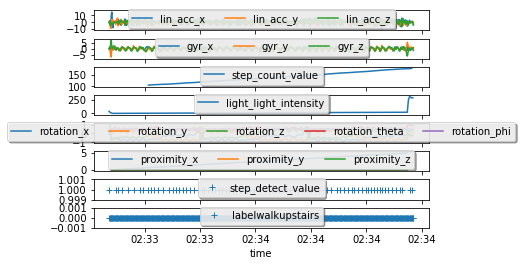

Running for granularity:250
added acceleeration
added gyroscope
added step counter
added light sensor
added rotation
added proximity


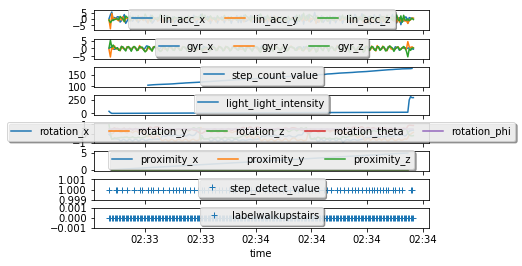

Running for granularity:1000
added acceleeration
added gyroscope
added step counter
added light sensor
added rotation
added proximity


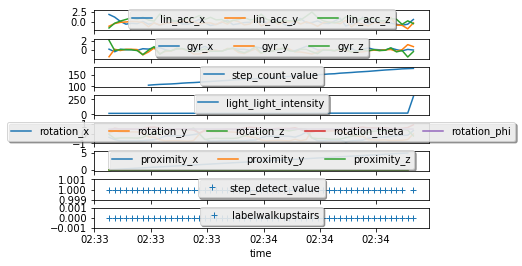

In [9]:
datasets1 = create_dataset(dataset_folder1,granularities=[100,250,1000])
datasets2 = create_dataset(dataset_folder2,granularities=[100,250,1000])


In [5]:
def visualizations(datasets,granularities=[100,250,1000]):
    
    DataViz = VisualizeDataset()
    
    rcParams['figure.figsize'] = (20,5)
    for i,dataset in enumerate(datasets):
        print('Dataset of granularity %d'%granularities[i])
        DataViz.plot_dataset(dataset, ['lin_acc_'],['like'],['line'],figname=str(granularities[i])+'_acceleration.png')
        DataViz.plot_dataset(dataset, ['gyr_'],['like'],['line'],figname=str(granularities[i])+'_gyroscope.png')
        DataViz.plot_dataset(dataset, ['rotation_'],['like'],['line'],figname=str(granularities[i])+'_rotation.png')


Dataset of granularity 100


CoursePythonCode/util/VisualizeDataset.py:36: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plot.hold(True)
/home/cts/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/cts/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


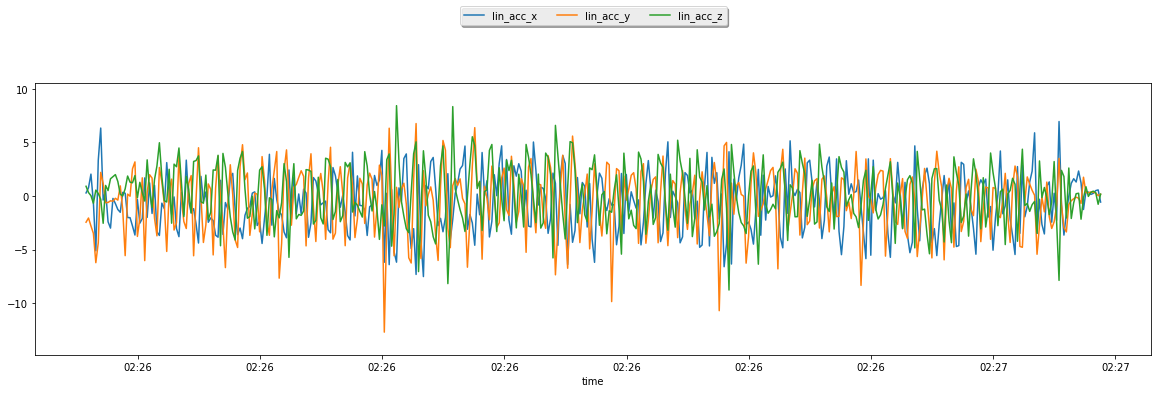

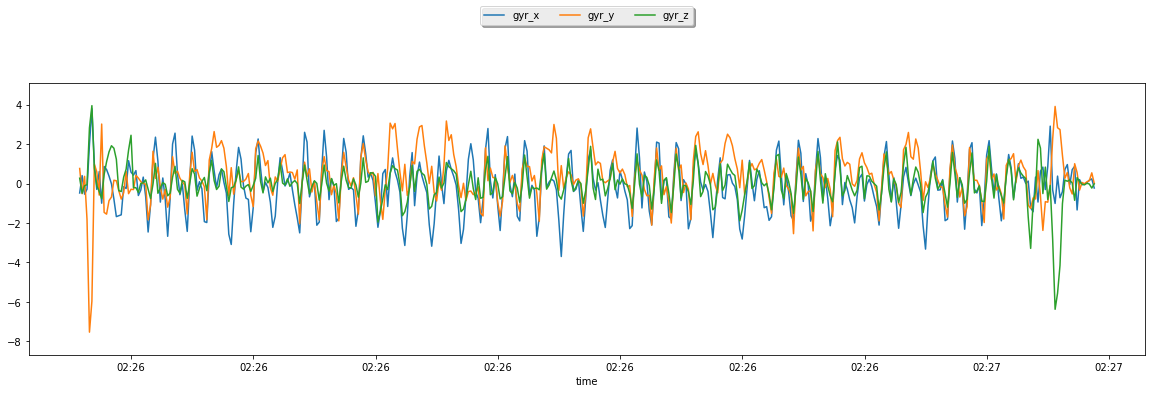

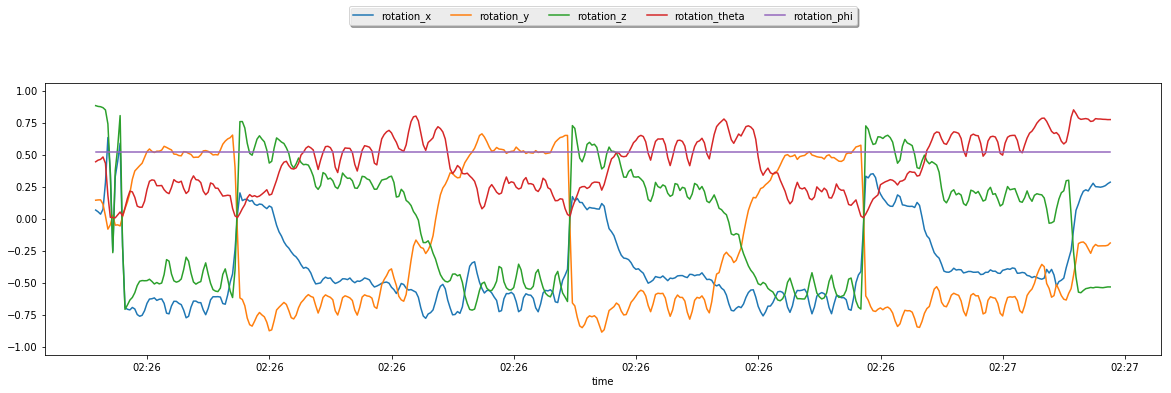

Dataset of granularity 250


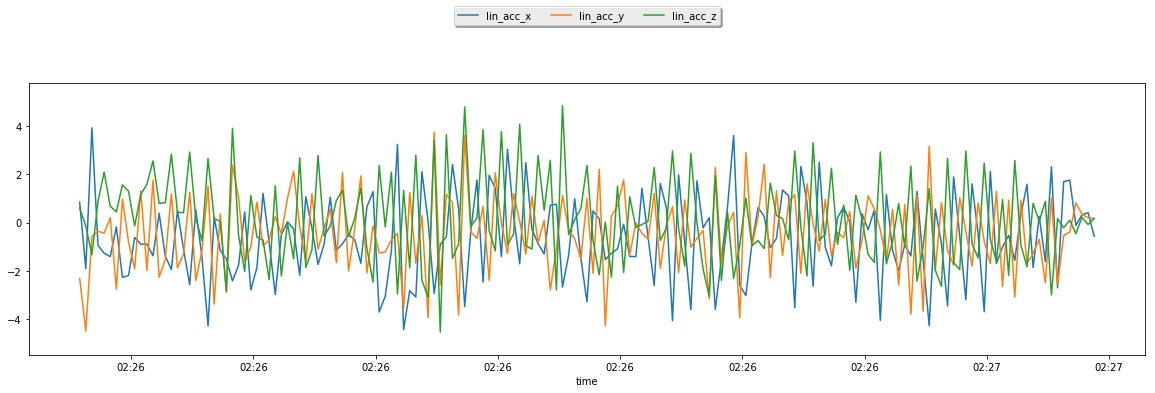

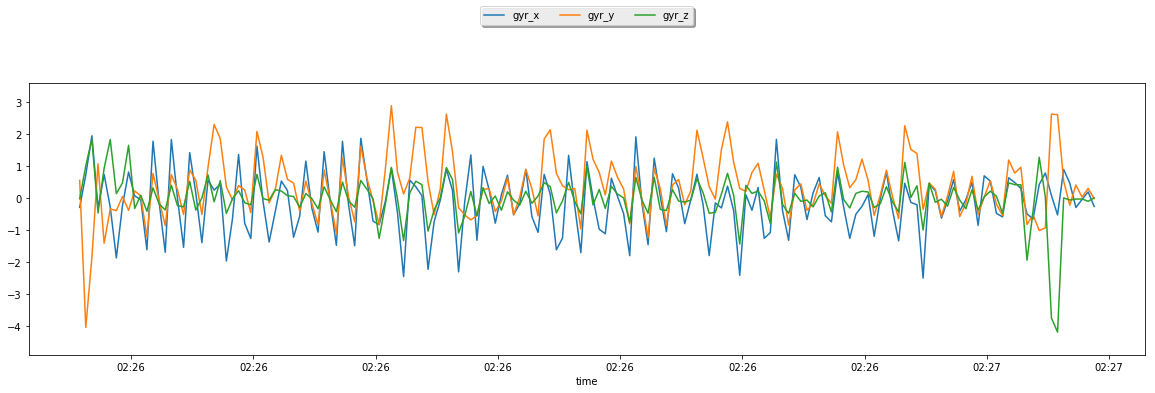

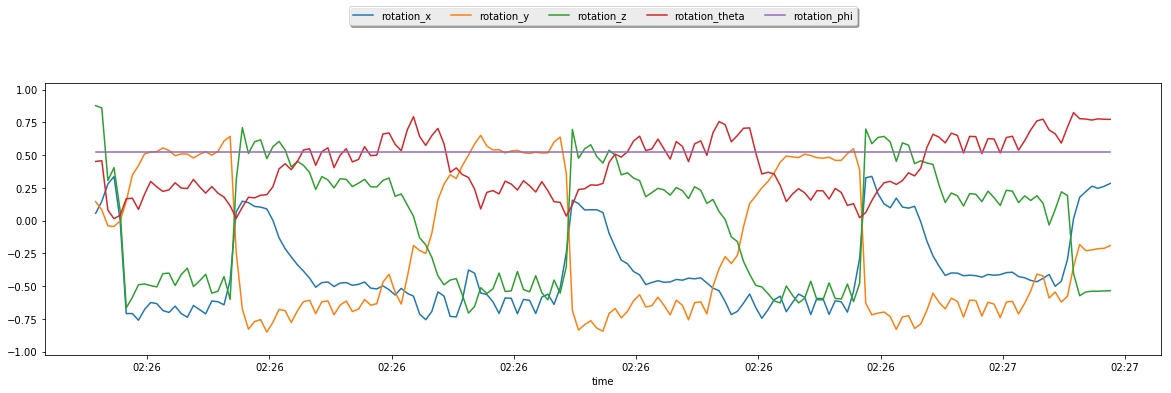

Dataset of granularity 1000


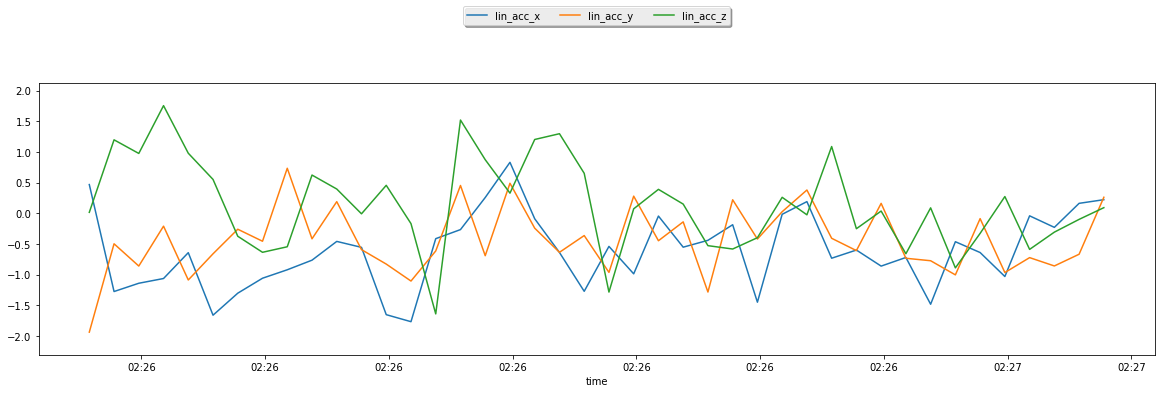

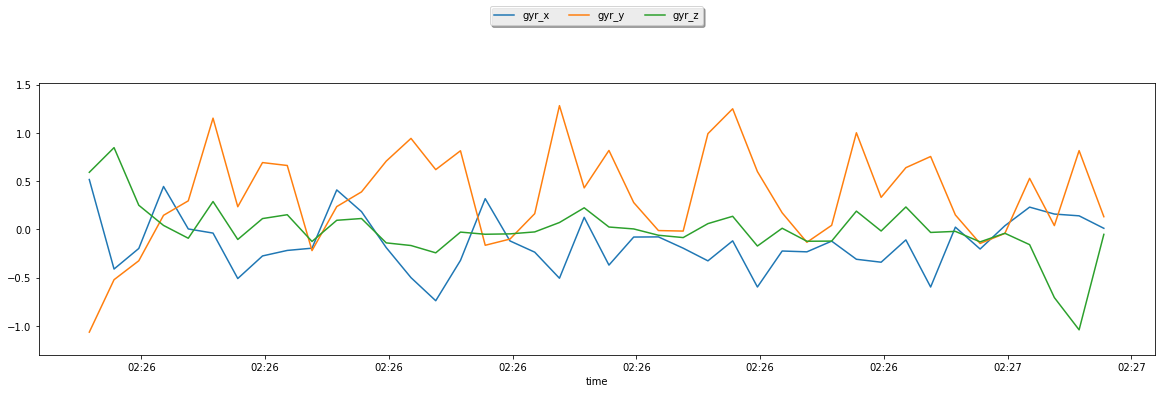

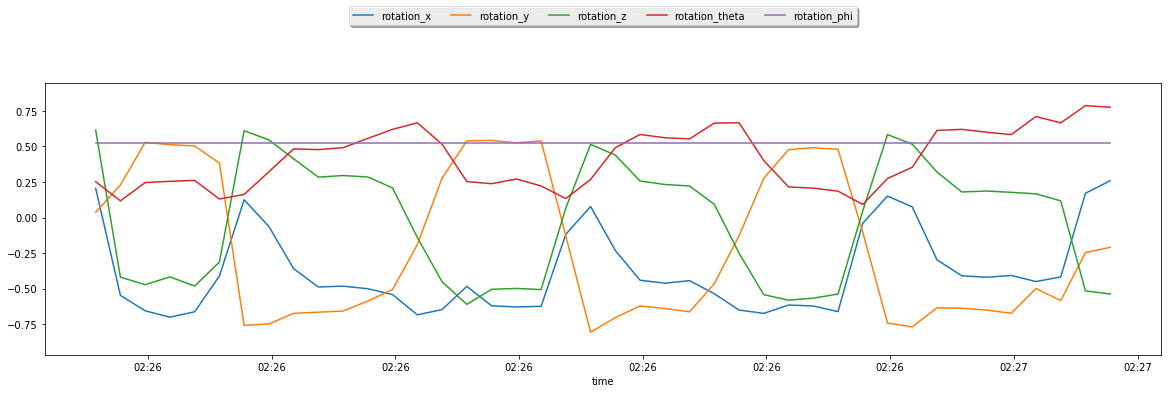

In [6]:
visualizations(datasets1)

Dataset of granularity 100


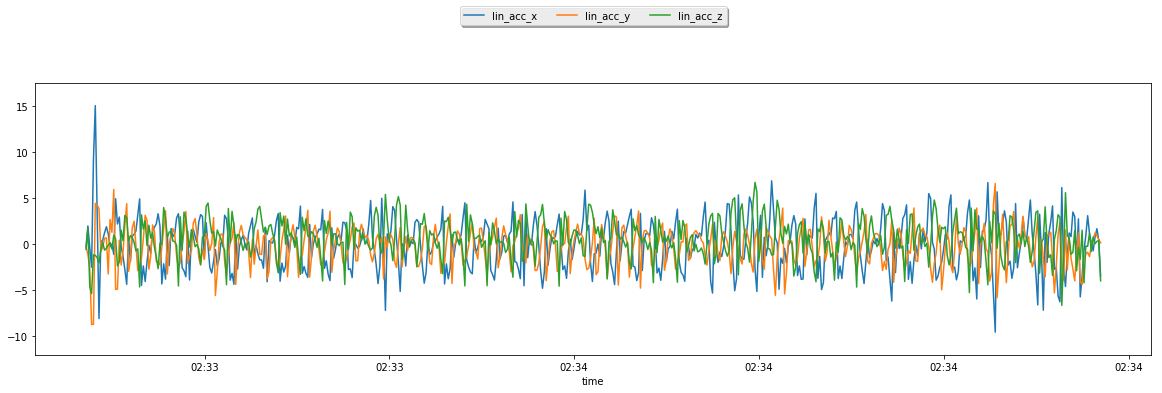

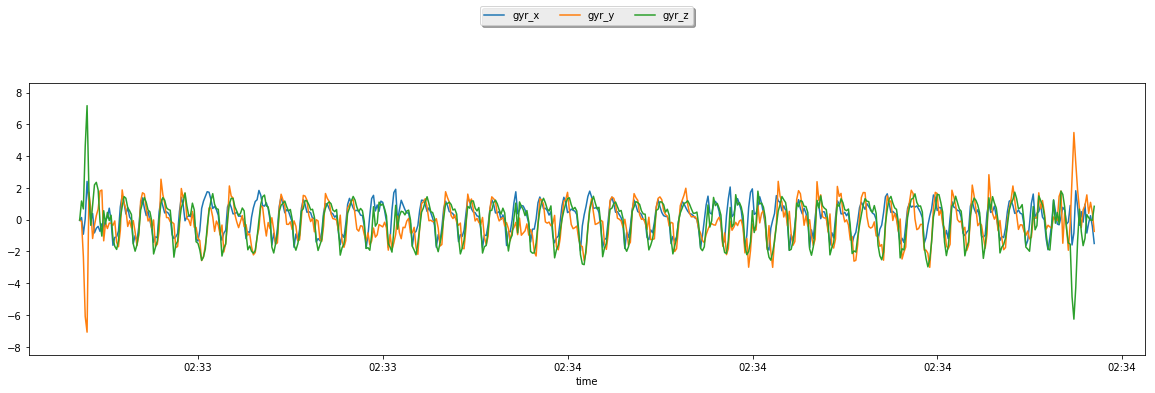

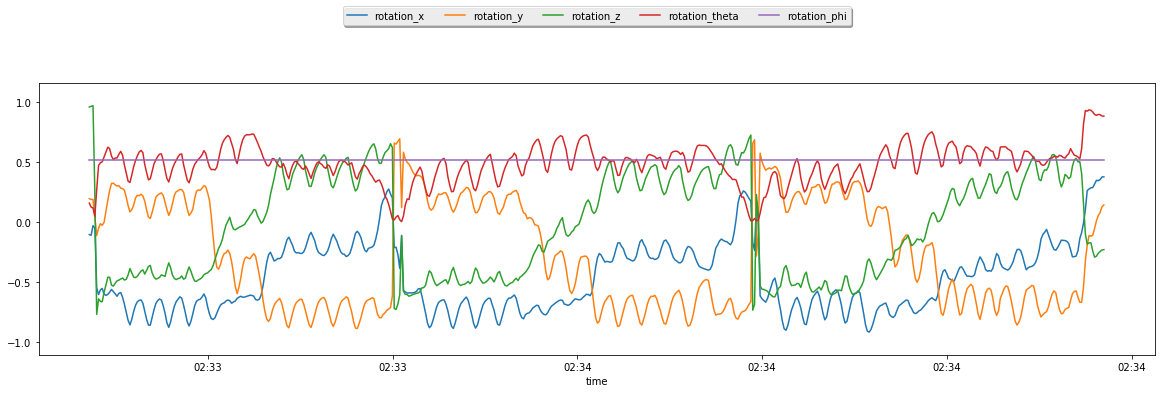

Dataset of granularity 250


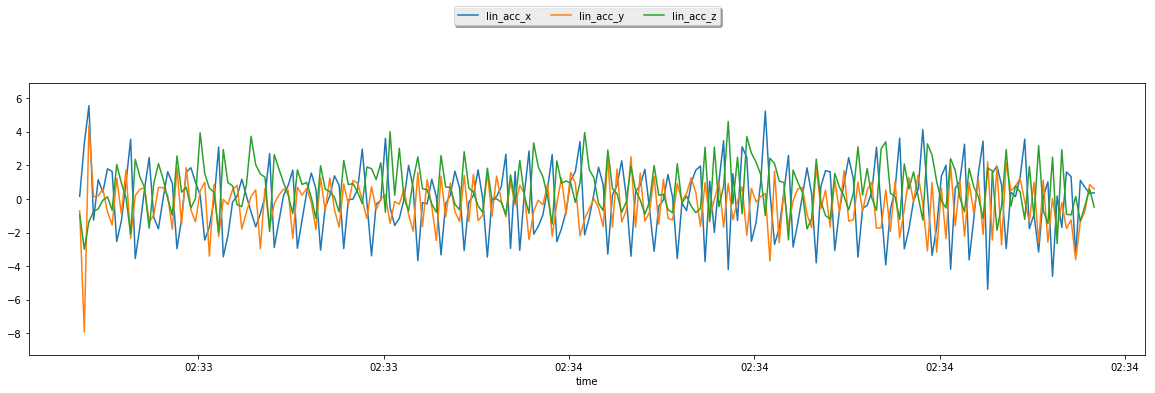

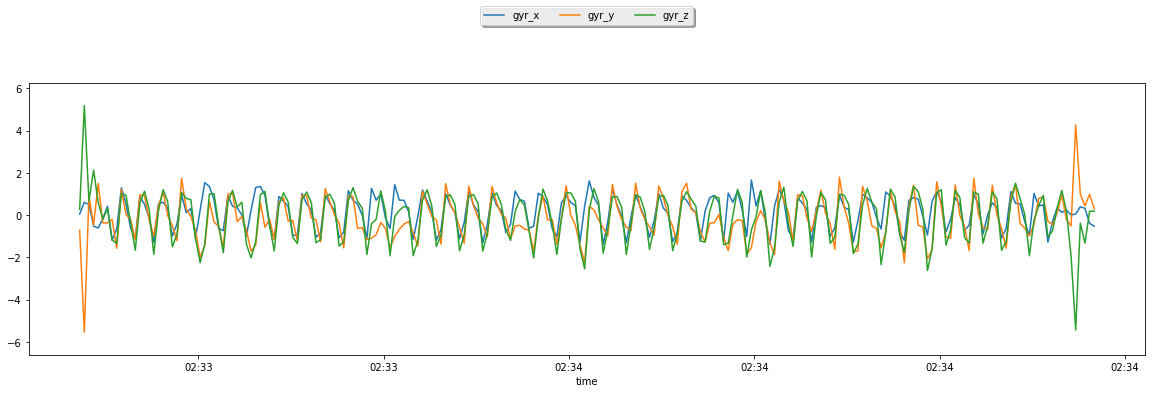

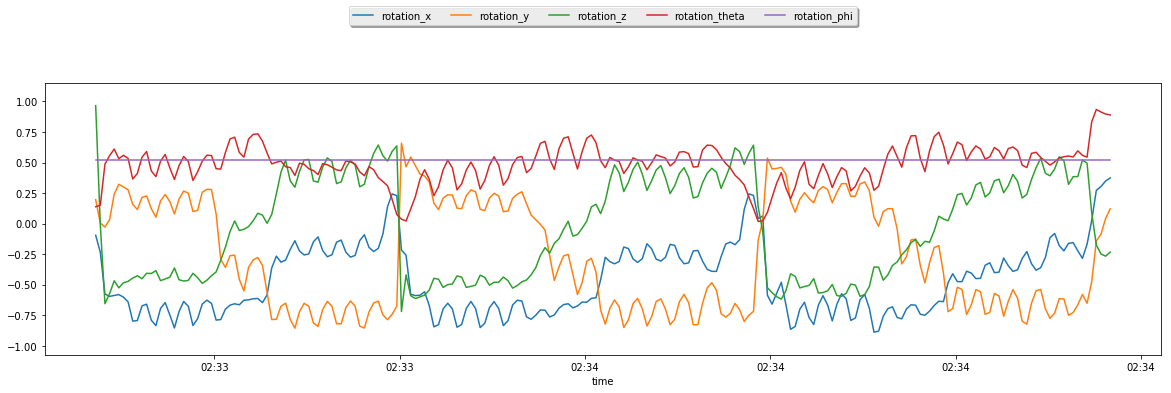

Dataset of granularity 1000


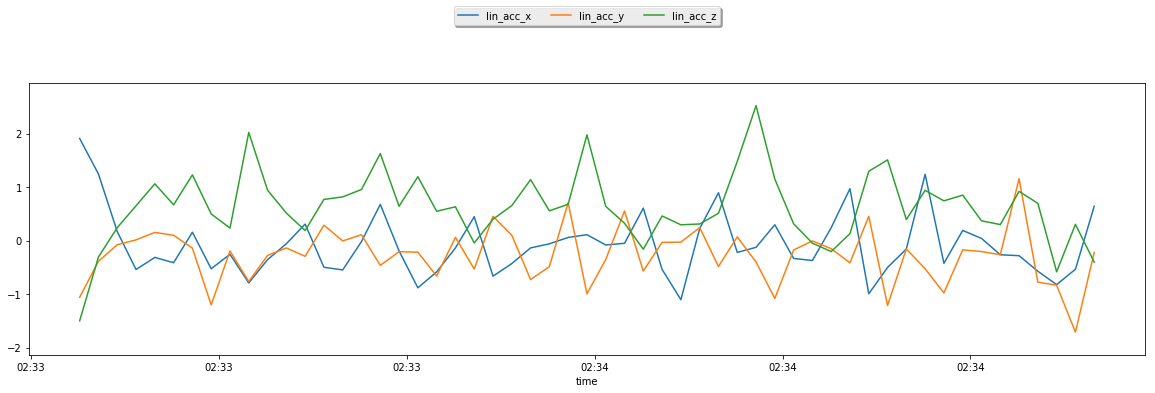

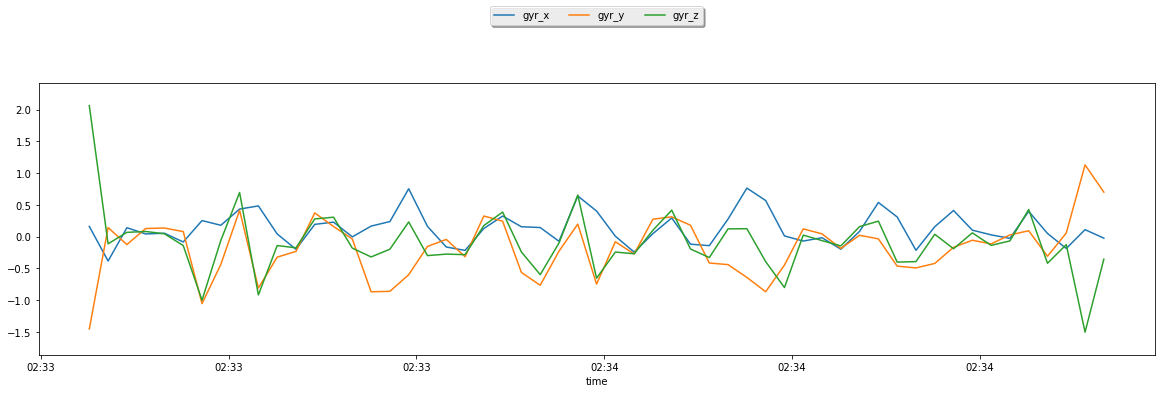

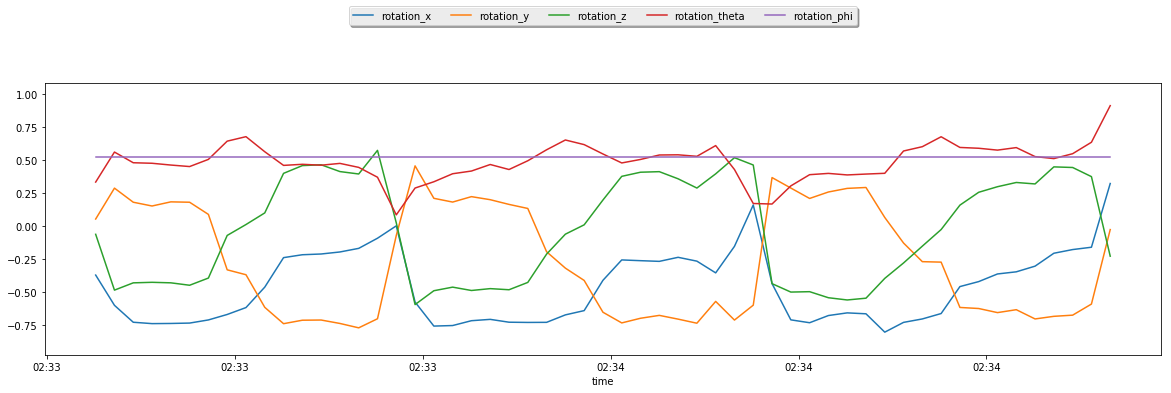

In [9]:
visualizations(datasets2)

In [ ]:
#DataViz.plot_dataset(dataset, ['acc_', 'gyro_'],['like', 'like'],['line', 'line'])
DataViz.plot_dataset(dataset, ['acc_'],['like'],['line'])

,lin_acc_x,lin_acc_y,lin_acc_z,gyr_x,gyr_y,gyr_z,step_count_value,light_light_intensity,rotation_x,rotation_y,rotation_z,rotation_theta,rotation_phi,proximity_x,proximity_y,proximity_z,step_detect_value,labelwalkupstairs
2017-06-11 02:33:34.588,0.154564,-0.710995,-0.922956,0.053034,-0.717294,0.270898,NaN,38.833000,-0.095248,0.196145,0.965527,0.138193,0.523599,NaN,NaN,NaN,1.0,0
2017-06-11 02:33:34.838,3.30486,-7.93018,-2.9894,0.604838,-5.533724,5.181875,NaN,14.296499,-0.234366,0.005285,-0.008477,0.150927,0.523599,NaN,NaN,NaN,NaN,0
2017-06-11 02:33:35.088,5.55236,4.38231,-1.34536,0.506638,0.909434,0.660853,NaN,0.000000,-0.575065,-0.028413,-0.655237,0.487124,0.523599,0.0,0.0,0.0,NaN,0
2017-06-11 02:33:35.338,-1.26168,0.130337,-0.746022,-0.516402,-0.467308,2.133207,NaN,NaN,-0.595624,0.031551,-0.573024,0.555721,0.523599,NaN,NaN,NaN,NaN,0
2017-06-11 02:33:35.588,1.15005,0.175072,-0.593107,-0.606648,1.500910,0.593626,NaN,NaN,-0.587623,0.242099,-0.467916,0.610562,0.523599,NaN,NaN,NaN,NaN,0
2017-06-11 02:33:35.838,0.403258,0.599127,-0.0829293,-0.169887,-0.364349,-0.191129,NaN,NaN,-0.580592,0.322249,-0.525437,0.530897,0.523599,NaN,NaN,NaN,1.0,0
2017-06-11 02:33:36.088,1.79409,-0.770006,0.12938,0.418863,-0.368246,0.316394,NaN,NaN,-0.601686,0.300236,-0.483937,0.559279,0.523599,NaN,NaN,NaN,1.0,0
2017-06-11 02:33:36.338,1.63622,-1.54932,-0.674146,-1.181231,-0.197856,-1.176176,NaN,NaN,-0.640692,0.276629,-0.472573,0.533884,0.523599,NaN,NaN,NaN,NaN,0
2017-06-11 02:33:36.588,-2.53645,1.23215,2.05023,-0.646948,-1.561727,-1.338657,NaN,NaN,-0.797821,0.157717,-0.445376,0.365111,0.523599,NaN,NaN,NaN,NaN,0
2017-06-11 02:33:36.838,-1.3069,-0.899033,0.944521,1.296398,1.227127,1.020208,NaN,NaN,-0.792942,0.115348,-0.426494,0.411418,0.523599,NaN,NaN,NaN,1.0,0


,lin_acc_x,lin_acc_y,lin_acc_z,gyr_x,gyr_y,gyr_z,step_count_value,light_light_intensity,rotation_x,rotation_y,rotation_z,rotation_theta,rotation_phi,proximity_x,proximity_y,proximity_z,step_detect_value,labelwalkdownstairs
2017-06-11 02:26:25.891,0.291867,-2.44181,0.911597,-0.476867,0.766965,0.273271,NaN,NaN,0.066665,0.143519,0.881969,0.443693,0.523599,NaN,NaN,NaN,NaN,0
2017-06-11 02:26:25.991,0.771441,-2.05113,0.327245,0.407230,-0.513383,-0.488070,NaN,NaN,0.052810,0.145789,0.876001,0.456461,0.523599,NaN,NaN,NaN,NaN,0
2017-06-11 02:26:26.091,2.04754,-2.78746,0.0377665,-0.535290,0.368075,-0.105993,NaN,87.231995,0.034421,0.146264,0.873712,0.462275,0.523599,NaN,NaN,NaN,NaN,0
2017-06-11 02:26:26.191,-0.610648,-3.4809,-0.673555,-0.284308,-1.817218,-0.056005,NaN,NaN,0.072926,0.112367,0.865975,0.481180,0.523599,NaN,NaN,NaN,NaN,0
2017-06-11 02:26:26.291,-5.11039,-6.21972,0.555636,1.988160,-7.536359,2.832353,NaN,80.013990,0.281415,0.020098,0.848197,0.431626,0.523599,NaN,NaN,NaN,NaN,0


In [39]:
dataframe.head()

,lin_acc_x,lin_acc_y,lin_acc_z,gyr_x,gyr_y,gyr_z,rotation_x,rotation_y,rotation_z,rotation_theta
2017-06-11 02:26:25.891,0.291867,-2.44181,0.911597,-0.476867,0.766965,0.273271,0.066665,0.143519,0.881969,NaN
2017-06-11 02:26:25.991,0.771441,-2.05113,0.327245,0.407230,-0.513383,-0.488070,0.052810,0.145789,0.876001,NaN
2017-06-11 02:26:26.091,2.04754,-2.78746,0.0377665,-0.535290,0.368075,-0.105993,0.034421,0.146264,0.873712,NaN
2017-06-11 02:26:26.191,-0.610648,-3.4809,-0.673555,-0.284308,-1.817218,-0.056005,0.072926,0.112367,0.865975,NaN
2017-06-11 02:26:26.291,-5.11039,-6.21972,0.555636,1.988160,-7.536359,2.832353,0.281415,0.020098,0.848197,NaN


,lin_acc_x,lin_acc_y,lin_acc_z,gyr_x,gyr_y,gyr_z,rotation_x,rotation_y,rotation_z,rotation_theta
2017-06-11 02:26:25.891,0.291867,-2.44181,0.911597,-0.476867,0.766965,0.273271,0.066665,0.143519,0.881969,0.443693
2017-06-11 02:26:25.991,0.771441,-2.05113,0.327245,0.407230,-0.513383,-0.488070,0.052810,0.145789,0.876001,0.456461
2017-06-11 02:26:26.091,2.04754,-2.78746,0.0377665,-0.535290,0.368075,-0.105993,0.034421,0.146264,0.873712,0.462275
2017-06-11 02:26:26.191,-0.610648,-3.4809,-0.673555,-0.284308,-1.817218,-0.056005,0.072926,0.112367,0.865975,0.481180
2017-06-11 02:26:26.291,-5.11039,-6.21972,0.555636,1.988160,-7.536359,2.832353,0.281415,0.020098,0.848197,0.431626


In [93]:
dataframe = datasets1[0]
dataframe = dataframe[['lin_acc_x','lin_acc_y','lin_acc_z',
                       'gyr_x','gyr_y','gyr_z','rotation_x',
                       'rotation_y','rotation_z','rotation_theta']]

Y = dataframe['rotation_theta'].copy().as_matrix()
frac = 0.1
indices = np.arange(len(Y))
np.random.shuffle(indices)


indices = indices.astype(int)
Y[indices[0:int(len(indices)*frac)]] = nan


/home/cts/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


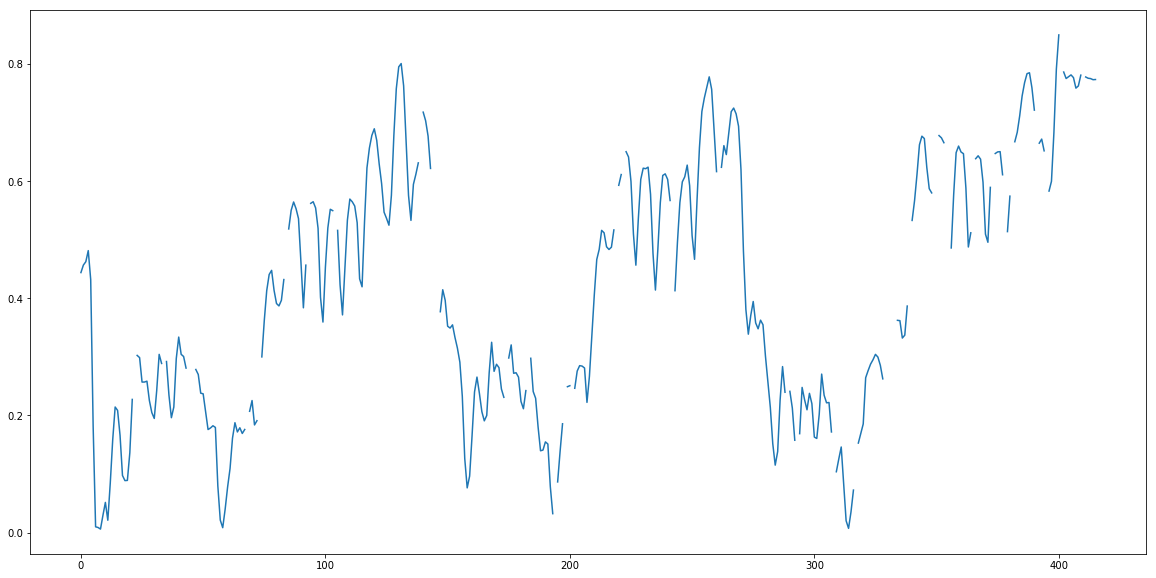

In [97]:
rcParams['figure.figsize'] = (20,10)
plt.plot(Y)
dataframe['rotation_theta'] = Y
dataframe.to_csv('df_for_explore.csv')

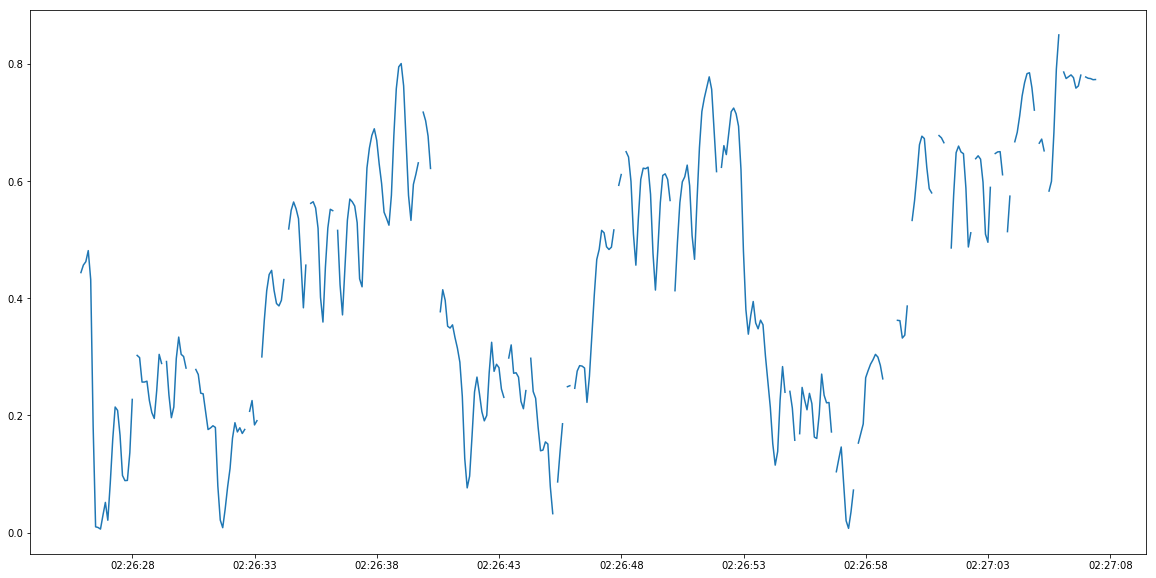

In [98]:
plt.plot(dataframe['rotation_theta'])

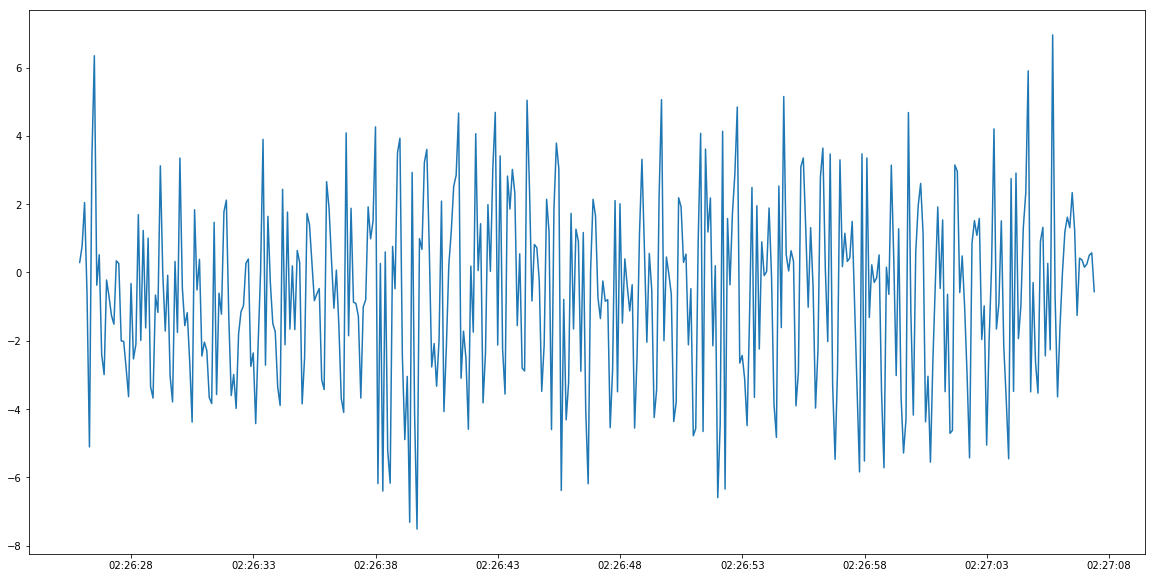

In [100]:
plt.plot(dataframe['lin_acc_x'])